**Problem Statement**

____

- Insurance companies aim to set accurate and fair premium charges for their customers. The dataset contains information about individuals' demographic, health, lifestyle, and medical history. The challenge is to predict the insurance charges for an individual based on these features, ensuring profitability while remaining competitive in the market.


---

**Objective**

Develop a predictive model to estimate insurance charges using the provided dataset. The model should:

1. Accurately predict the premium amount based on factors such as age, BMI, smoking habits, region, and health metrics.


2. Help the company identify which factors most influence premium costs.


3. Enable data-driven decisions for pricing strategies to balance customer satisfaction and profitability.


**About the data**

- age : Age of the individual.


- sex : Gender of the individual (e.g., male, female).


- bmi : Body Mass Index, a measure of body fat based on height and weight.


- children : Number of dependent children.


- smoker : Indicates if the individual is a smoker (e.g., yes/no or binary).


- Claim_Amount : Amount claimed by the individual (likely in monetary terms).


- past_consultations : Number of medical consultations the individual had in the past.


- num_of_steps : Number of steps taken, potentially from a fitness tracker.


- Hospital_expenditure : Total expenditure on hospital services.


- Number_of_past_hospitalizations : Total number of times the individual was hospitalized previously.


- Anual_Salary : Annual salary of the individual.


- region : Geographical region where the individual resides.


- charges : Insurance charges or premiums for the individual.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('new_insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,200.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.shape

(1338, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


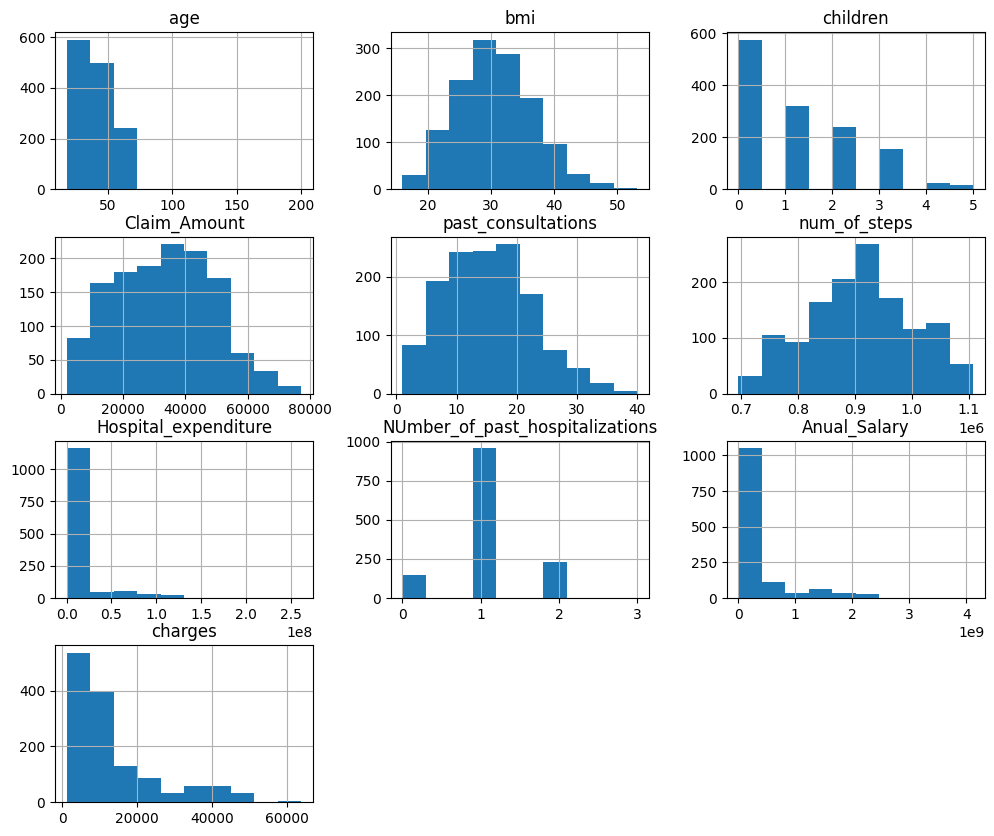

In [ ]:
df.hist(figsize=(12,10))
plt.show()

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)
df['Claim_Amount'].fillna(df['Claim_Amount'].median(), inplace=True)
df['past_consultations'].fillna(df['past_consultations'].median(), inplace=True)
df['num_of_steps'].fillna(df['num_of_steps'].mean(), inplace=True)
df['Hospital_expenditure'].fillna(df['Hospital_expenditure'].median(), inplace=True)
df['NUmber_of_past_hospitalizations'].fillna(df['NUmber_of_past_hospitalizations'].median(), inplace=True)
df['Anual_Salary'].fillna(df['Anual_Salary'].median(), inplace=True)

<ipython-input-193-d711fbaf3efa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-193-d711fbaf3efa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northeast': 0,
                                 'northwest': 1,
                                 'southeast': 2,
                                 'southwest': 3})

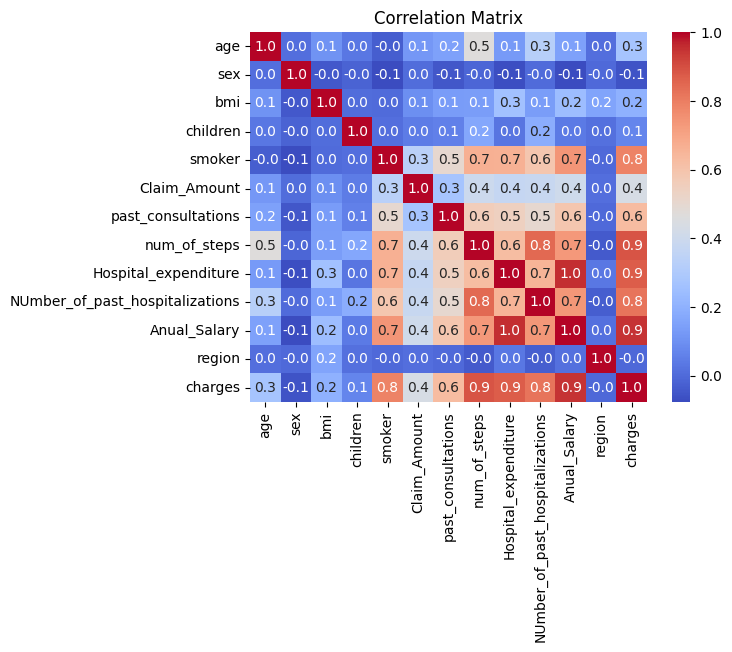

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True, fmt='0.01f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(columns=['age','sex','bmi','children','Claim_Amount','region','Hospital_expenditure','NUmber_of_past_hospitalizations'], inplace=True)

In [ ]:
df

,smoker,past_consultations,num_of_steps,Anual_Salary,charges
0,0,17.0,715428.0,5.578497e+07,1121.87390
1,0,7.0,699157.0,1.370089e+07,1131.50660
2,0,19.0,702341.0,7.352311e+07,1135.94070
3,0,11.0,700250.0,7.581968e+07,1136.39940
4,0,16.0,711584.0,2.301232e+07,1137.01100
...,...,...,...,...,...
1333,1,32.0,1091267.0,3.101107e+09,55135.40209
1334,1,31.0,1107872.0,3.484216e+09,58571.07448
1335,1,25.0,1092005.0,3.640807e+09,60021.39897
1336,1,34.0,1106821.0,4.006359e+09,62592.87309


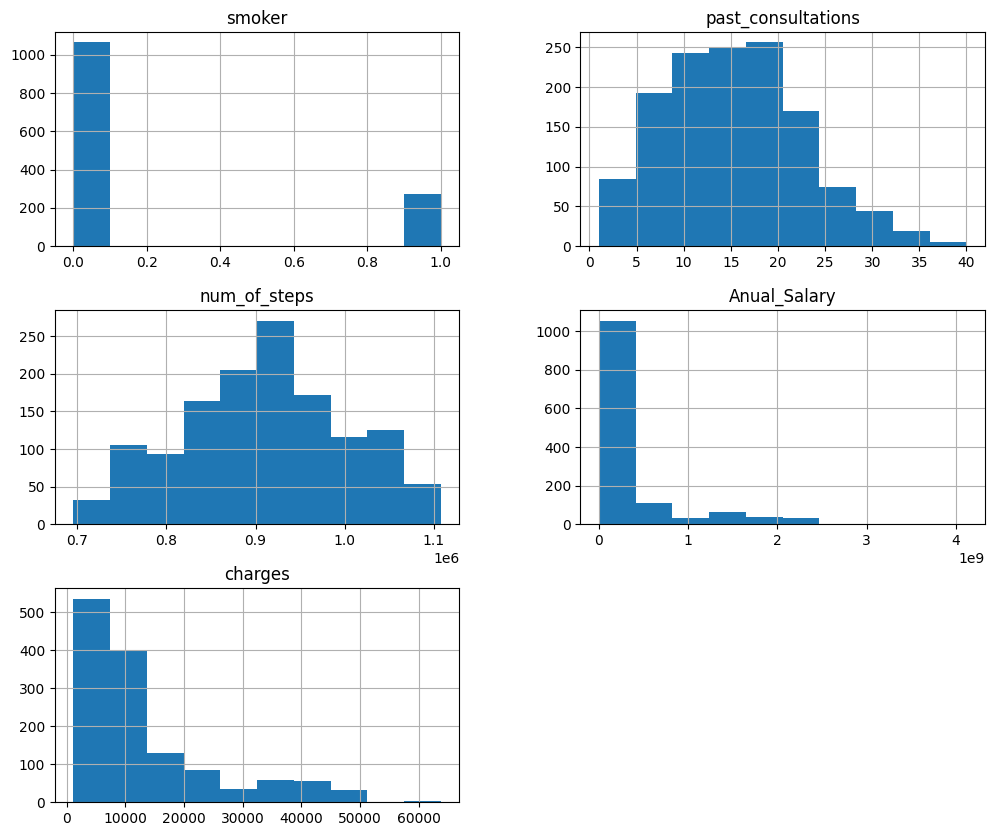

In [ ]:
df.hist(figsize=(12,10))
plt.show()

In [ ]:
df['past_consultations'] = np.log1p(df['past_consultations'])
df['Anual_Salary'] = np.log1p(df['Anual_Salary'])

<Axes: >

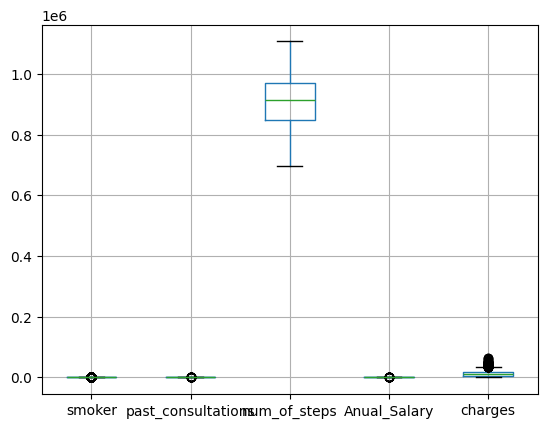

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='charges')
df_cleaned

,smoker,past_consultations,num_of_steps,Anual_Salary,charges
0,0,2.890372,715428.0,17.837015,1121.87390
2,0,2.995732,702341.0,18.113110,1135.94070
3,0,2.484907,700250.0,18.143868,1136.39940
4,0,2.833213,711584.0,16.951540,1137.01100
5,0,3.044522,717162.0,18.770887,1137.46970
...,...,...,...,...,...
1145,0,3.258097,1014768.0,20.403455,26018.95052
1148,0,2.708050,1005127.0,20.359911,26140.36030
1149,0,3.258097,1020762.0,20.451604,26236.57997
1150,0,2.708050,1022959.0,20.372978,26392.26029


In [ ]:
df = df_cleaned

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['smoker', 'past_consultations', 'num_of_steps', 'Anual_Salary', 'charges']
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [ ]:
df=scaled_df

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['smoker', 'past_consultations', 'num_of_steps', 'Anual_Salary']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.004417331744340635, RMSE: 0.06646301034666302, R-squared: 0.8821176034633762


**Summary**

- The models were evaluated using R², RMSE, and MAE to assess the accuracy and error distribution in predicting the target variable.

- The Linear Regression model was selected as the best model due to its highest R² value of 0.88, lowest RMSE of 0.06, and lowest MAE of 0.004. This indicates that the model provides the most accurate and reliable predictions.